## Business Understanding

### `Project Description`
Imagine being at the helm of a business with a treasure trove of transactional data, brimming with untapped potential, yet unable to harness its power. That's where our client finds themselves—a company sitting on a goldmine of 2019 transactional data, eager to uncover insights that could propel their business to new heights. They've turned to us, seeking a transformative business intelligence solution that not only answers their pressing questions but also illuminates hidden opportunities to boost sales and streamline operations.

Enter getINNOtized, a dynamic organization dedicated to connecting talented data professionals with businesses in need of innovative data solutions. Through their platform, companies can leverage top-tier analytical expertise to unlock the full potential of their data. getINNOtized has assigned us this mission, confident in our ability to deliver a comprehensive, actionable business intelligence report that will empower the client to make informed, strategic decisions. Our task is clear: dive deep into this data, decode its secrets, and deliver insights that guide the client towards increased revenue and enhanced efficiency.

#### **Key Stakeholders**
The stakeholders include the client's company executives, sales and marketing team, product management team, logistics and supply chain team, IT and data team, getINNOtized and external stakeholders(investors and suppliers)

#### **Success Criteria**

The success of this project will be measured by the ability to deliver a detailed and actionable business intelligence report that answers the client's questions and provides insights for driving sales and efficiency. The report should be clear, visually appealing, and easy to understand, providing the client with a solid foundation for making data-driven decisions.

#### **Constraints and Considerations**

- Data Quality: Ensure the data is clean, accurate, and complete before analysis.
- Timeliness: The analysis and report should be delivered within the agreed-upon timeframe.
- Client Collaboration: Regular communication with the client to understand their needs and provide updates on progress.
- Tool Selection: Utilize appropriate data analysis and visualization tools to generate insights and present findings effectively.

#### **Data Requirements**
- Utilize data that was collected for each month in the entire year of 2019. The data for the first half of the year (January to June) was collected in excel and saved as csv files before management decided to use databases to store their data for analysis.

**<i>NB</i>** Additionally, categorize products based on their unit prices:
- Products with unit prices above $99.99 should be labeled as high-level products.
- Products with unit prices $99.99 and below should be labeled as basic-level products.

#### **Business Impact**
- Enhance customer satisfaction through better product availability.
- Optimize inventory management, leading to cost savings and improved operational efficiency.

### `Hypothesis`

*Null Hypothesis (Ho):* 

*Alternate Hypothesis (Ha):* 

### `Analytical Business Questions`

1. How much money did we make this year?
2. Can we identify any seasonality in the  sales?
3. What are our best and worst-selling products?
4. How do sales compare to previous months or weeks? 
5. Which cities are our products delivered to most? 
6. How do product categories compare in revenue generated and quantities  ordered?
7. You are required to show additional details from your findings in your data.

### `Importations`

In [353]:
# Import the necessary libraries

# Data Connection
import pyodbc
from dotenv import dotenv_values

# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Stats Packages
from scipy.stats import stats


# Others
from datetime import datetime
import os
from itertools import product
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

print("PACKAGE SUCCESS!! 🎉")


PACKAGE SUCCESS!! 🎉


### `Data Connection`

In [270]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("user")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [271]:
# Get the cursor
# The connection cursor is used to execute statements to communicate with the MySQL database
cursor = connection.cursor()
# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')
# Fetch all the table names
tables = table_names.fetchall()
# Print the table names
for table in tables:
    print(table.table_name)

Sales_August_2019
Sales_December_2019
Sales_July_2019
Sales_November_2019
Sales_October_2019
Sales_September_2019
change_streams_destination_type
change_streams_partition_scheme
trace_xe_action_map
trace_xe_event_map


In [272]:
# sql query to get the datasets
query = "SELECT * FROM Sales_August_2019"
query2 = "SELECT * FROM Sales_December_2019"
query3 = "SELECT * FROM Sales_July_2019"
query4 = "SELECT * FROM Sales_November_2019"
query5 = "SELECT * FROM Sales_October_2019"
query6 = "SELECT * FROM Sales_September_2019"

Aug = pd.read_sql(query,connection)
Dec = pd.read_sql(query2,connection)
Jul = pd.read_sql(query3,connection)
Nov = pd.read_sql(query4,connection)
Oct = pd.read_sql(query5,connection)
Sept = pd.read_sql(query6,connection)

In [273]:
# save tables to csv
Aug.to_csv('data\Sales_August_2019.csv', index=False)
Dec.to_csv('data\Sales_December_2019.csv', index=False)
Jul.to_csv('data\Sales_July_2019.csv', index=False)
Nov.to_csv('data\Sales_November_2019.csv', index=False)
Oct.to_csv('data\Sales_October_2019.csv', index=False)
Sept.to_csv('data\Sales_September_2019.csv', index=False)

In [274]:
Oct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20379 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          20284 non-null  float64
 1   Product           20317 non-null  object 
 2   Quantity_Ordered  20284 non-null  float64
 3   Price_Each        20284 non-null  float64
 4   Order_Date        20284 non-null  object 
 5   Purchase_Address  20317 non-null  object 
dtypes: float64(3), object(3)
memory usage: 955.4+ KB


In [275]:
Oct.isna().sum()

Order_ID            95
Product             62
Quantity_Ordered    95
Price_Each          95
Order_Date          95
Purchase_Address    62
dtype: int64

In [320]:
second_half = pd.concat([Jul, Aug, Sept, Oct, Nov, Dec])
second_half.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.00,Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.00,Flatscreen TV,1.00,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"


In [321]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101225 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100925 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100925 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [322]:
second_half.isna().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

In [323]:
second_half['Order_Date'] = second_half['Order_Date'].str[2:]

In [324]:
second_half

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.00,Apple Airpods Headphones,1.00,150.00,26-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.00,Flatscreen TV,1.00,300.00,05-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.00,AA Batteries (4-pack),1.00,3.84,29-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.00,AA Batteries (4-pack),1.00,3.84,28-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.00,AAA Batteries (4-pack),5.00,2.99,31-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
25112,319666.00,Lightning Charging Cable,1.00,14.95,11-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.00,AA Batteries (4-pack),2.00,3.84,01-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.00,Vareebadd Phone,1.00,400.00,09-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.00,Wired Headphones,1.00,11.99,03-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [325]:
second_half.isna().sum()

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64

In [326]:
second_half = second_half.dropna()

In [327]:
second_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100730 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          100730 non-null  float64
 1   Product           100730 non-null  object 
 2   Quantity_Ordered  100730 non-null  float64
 3   Price_Each        100730 non-null  float64
 4   Order_Date        100730 non-null  object 
 5   Purchase_Address  100730 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


In [328]:
second_half['Order_ID'] = second_half['Order_ID'].astype(int)
second_half['Quantity_Ordered'] = second_half['Quantity_Ordered'].astype(int)
second_half['Order_Date'] = pd.to_datetime(second_half['Order_Date'], errors='coerce')

In [329]:
second_half.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2019-05-07 08:55:00,"590 4th St, Seattle, WA 98101"


In [330]:
second_half.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

## Loading First 6 months of the data can be found in this OneDrive

In [285]:
Apr = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_April_2019.xlsx')
Feb = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_February_2019.xlsx')
Jan = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_January_2019.xlsx')
Jun = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_June_2019.xlsx')
Mar = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_March_2019.xlsx')
May = pd.read_excel('C:\\Users\\KEMUNTO\\Downloads\\Sales_May_2019.xlsx')

In [286]:
Jan.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"


In [287]:
Jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [288]:
Jan.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [289]:
first_half = pd.concat([Jan, Feb, Mar, Apr, May, Jun], ignore_index=True)
first_half

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
85620,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
85621,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
85622,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
85623,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [290]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [291]:
first_half.isna().sum()

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64

In [292]:
first_half = first_half.dropna()
first_half.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [293]:
first_half.duplicated().sum()
first_half.drop_duplicates()
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85380 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [294]:
first_half.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [295]:
first_half['Quantity Ordered'].value_counts()

Quantity Ordered
1                   77205
2                    6147
3                    1357
4                     357
Quantity Ordered      160
5                     117
6                      29
7                       7
9                       1
Name: count, dtype: int64

In [296]:
object_to_delete = 'Quantity Ordered'
rows = first_half[first_half['Quantity Ordered'] == object_to_delete]
first_half = first_half.drop(rows.index)

In [297]:
first_half['Order Date'] = pd.to_datetime(first_half['Order Date'])

In [298]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85220 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85220 non-null  object        
 1   Product           85220 non-null  object        
 2   Quantity Ordered  85220 non-null  object        
 3   Price Each        85220 non-null  object        
 4   Order Date        85220 non-null  datetime64[ns]
 5   Purchase Address  85220 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 4.6+ MB


In [299]:
first_half['Order ID'] = pd.to_numeric(first_half['Order ID'], errors='coerce')
first_half['Quantity Ordered'] = pd.to_numeric(first_half['Quantity Ordered'], errors='coerce')
first_half['Price Each'] = pd.to_numeric(first_half['Price Each'], errors='coerce')

In [300]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85220 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          85220 non-null  int64         
 1   Product           85220 non-null  object        
 2   Quantity Ordered  85220 non-null  int64         
 3   Price Each        85220 non-null  float64       
 4   Order Date        85220 non-null  datetime64[ns]
 5   Purchase Address  85220 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [333]:
# Define the renaming dictionary
rename_dict = {
    'Order ID': 'Order_ID',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each':'Price_Each',
    'Order Date':'Order_Date',
    'Purchase Address':'Purchase_Address',
}

# List of DataFrames
dataframes = [first_half]

# Rename columns in each DataFrame
for df in dataframes:
    df.rename(columns=rename_dict, inplace=True)


In [334]:
first_half.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85220 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          85220 non-null  int64         
 1   Product           85220 non-null  object        
 2   Quantity_Ordered  85220 non-null  int64         
 3   Price_Each        85220 non-null  float64       
 4   Order_Date        85220 non-null  datetime64[ns]
 5   Purchase_Address  85220 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [335]:
#concantinating the two half of the years
df = pd.concat([first_half, second_half])

In [336]:
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [337]:
df.drop_duplicates()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-11-12 20:58:00,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,2019-01-12 12:01:00,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,2019-09-12 06:43:00,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,2019-03-12 10:39:00,"778 River St, Dallas, TX 75001"


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [339]:
df['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

# Feature Imputation

Mapping items into categories

In [340]:
mapping = {
    'USB-C Charging Cable': 'Charging Cables',
    'Lightning Charging Cable': 'Charging Cables',
    'AAA Batteries (4-pack)': 'Batteries',
    'AA Batteries (4-pack)': 'Batteries',
    'Wired Headphones': 'Headphones',
    'Apple Airpods Headphones': 'Headphones',
    'Bose SoundSport Headphones': 'Headphones',
    '27in FHD Monitor': 'Monitors',
    '27in 4K Gaming Monitor': 'Monitors',
    '34in Ultrawide Monitor': 'Monitors',
    '20in Monitor': 'Monitors',
    'iPhone': 'Mobile Phones',
    'Google Phone': 'Mobile Phones',
    'Vareebadd Phone': 'Mobile Phones',
    'Flatscreen TV': 'Televisions',
    'Macbook Pro Laptop': 'Laptops',
    'ThinkPad Laptop': 'Laptops',
    'LG Washing Machine': 'Home Appliances',
    'LG Dryer': 'Home Appliances'
}

In [341]:
df['Category'] = df['Product'].map(mapping)

Mapping by item value

In [342]:
df['Level'] = np.where(df['Price_Each'] > 99, 'High level', 'Basic level')

In [343]:
# computing a sales column
df['Sales'] = df['Price_Each']*df['Quantity_Ordered']

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
 6   Category          185950 non-null  object        
 7   Level             185950 non-null  object        
 8   Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.2+ MB


In [345]:
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
Category            0
Level               0
Sales               0
dtype: int64

In [346]:
df = df[df['Order_Date'] <= '2019-12-31 11:59:59']

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185391 entries, 0 to 25116
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185391 non-null  int64         
 1   Product           185391 non-null  object        
 2   Quantity_Ordered  185391 non-null  int64         
 3   Price_Each        185391 non-null  float64       
 4   Order_Date        185391 non-null  datetime64[ns]
 5   Purchase_Address  185391 non-null  object        
 6   Category          185391 non-null  object        
 7   Level             185391 non-null  object        
 8   Sales             185391 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 14.1+ MB


In [348]:
# Save database to csv
df.to_csv('data/full_data.csv')

In [349]:
df.index = df['Order_Date']
df = df.drop('Order_Date', axis=1)
df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Category,Level,Sales
Order_Date,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",Mobile Phones,High level,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",Charging Cables,Basic level,14.95


## Answering Questions

Question 1: How much money did we make this year?

In [351]:
total_sales = df['Sales'].sum()
print('---------------------------')
print(f"Total Sales: {total_sales:,.2f}")
print('---------------------------')

---------------------------
Total Sales: 34,392,253.89
---------------------------


Question 2: Can we identify any seasonality in the sales?

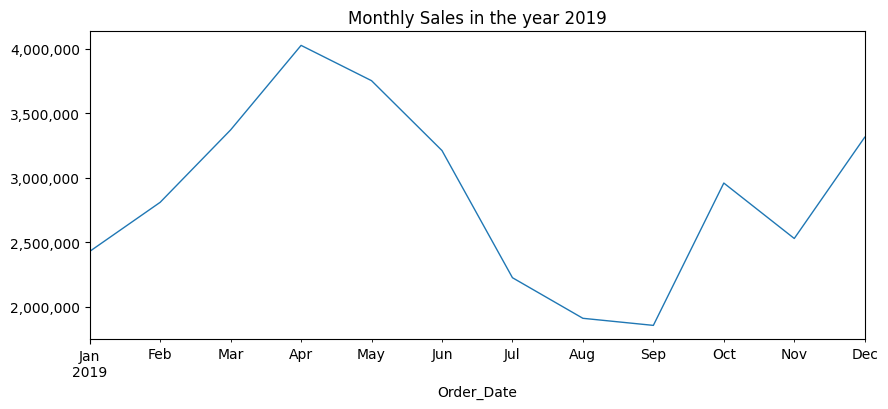

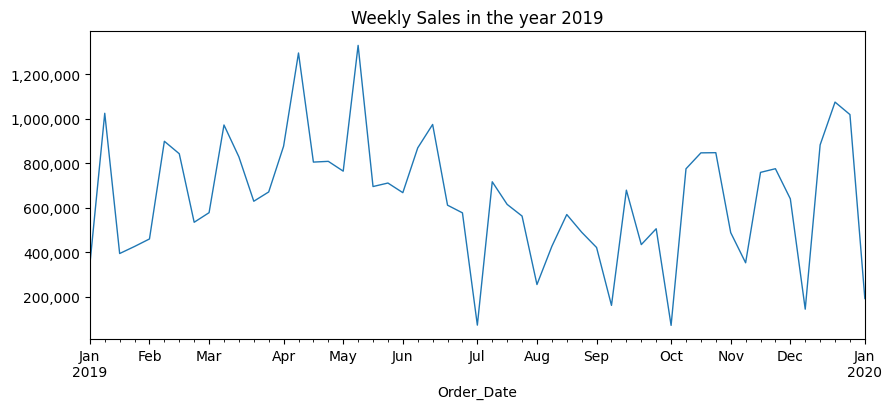

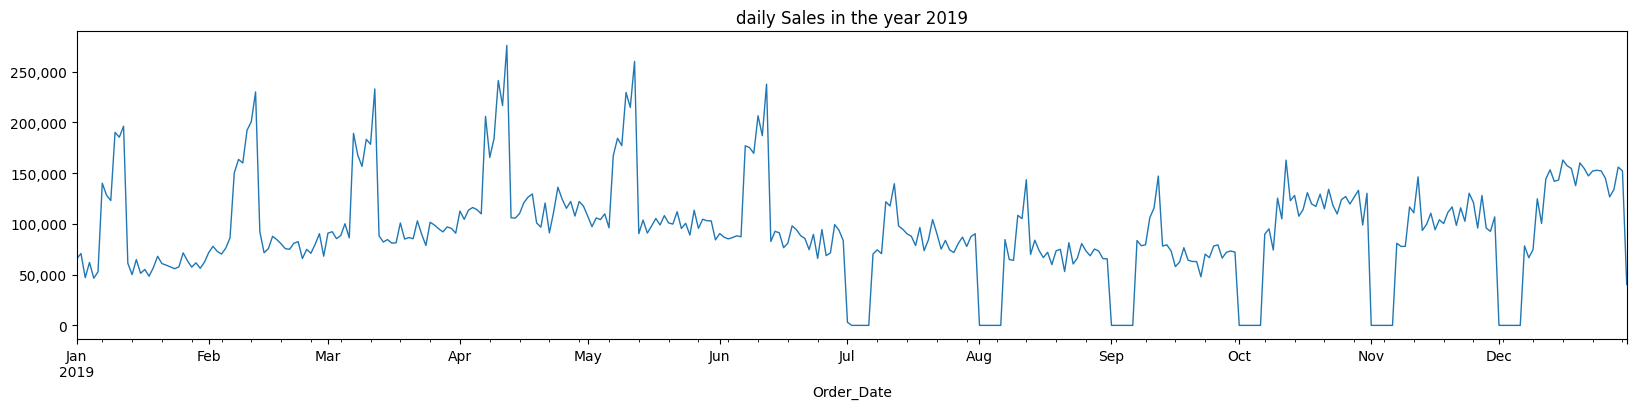

In [354]:
monthly_sales = df['Sales'].resample('M').sum()
weekly_sales = df['Sales'].resample('W').sum()
daily_sales = df['Sales'].resample('D').sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(linewidth=1)
plt.title('Monthly Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure(figsize=(10,4))
weekly_sales.plot(linewidth=1)
plt.title('Weekly Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.figure(figsize=(20,4))
daily_sales.plot(linewidth=1)
plt.title('daily Sales in the year 2019')
# Format y-axis tick labels to show the full numbers
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

Question 3: What are our best and worst-selling products?

In [355]:
# Group by 'Product', summing the 'Sales' and 'Quantity_ordered' columns
df_sales = df.groupby('Product').agg({'Quantity_Ordered': 'sum', 'Sales': 'sum'}).reset_index()
df_sales = df_sales.sort_values(by='Sales', ascending=False)
df_sales = pd.DataFrame(df_sales).reset_index()
df_sales = df_sales.drop('index', axis=1)
print(f"The product with the highest revenue is {df_sales['Product'][0]} with ${df_sales['Sales'][0]:,.2f}")
print(f"The product with the lowest revenue is {df_sales['Product'][18]} with ${df_sales['Sales'][18]:,.2f}")
print('--------------------------------------------------------------------------------------------------------')
print("However the Vareebadd Phone and 20in Monitor may be the worst selling products because they are the worst by qauntity and revenue in their categories")
print('--------------------------------------------------------------------------------------------------------')

The product with the highest revenue is Macbook Pro Laptop with $8,013,800.00
The product with the lowest revenue is AAA Batteries (4-pack) with $92,420.90
--------------------------------------------------------------------------------------------------------
However the Vareebadd Phone and 20in Monitor may be the worst selling products because they are the worst by qauntity and revenue in their categories
--------------------------------------------------------------------------------------------------------


In [356]:
df_sales

,Product,Quantity_Ordered,Sales
0,Macbook Pro Laptop,4714,8013800.00
1,iPhone,6832,4782400.00
2,ThinkPad Laptop,4112,4111958.86
3,Google Phone,5517,3310200.00
4,27in 4K Gaming Monitor,6233,2430807.64
5,34in Ultrawide Monitor,6188,2351378.09
6,Apple Airpods Headphones,15620,2343000.00
7,Flatscreen TV,4801,1440300.00
8,Bose SoundSport Headphones,13423,1342165.75
9,27in FHD Monitor,7531,1129574.71


Question 4 : How do sales compare to previous months or weeks

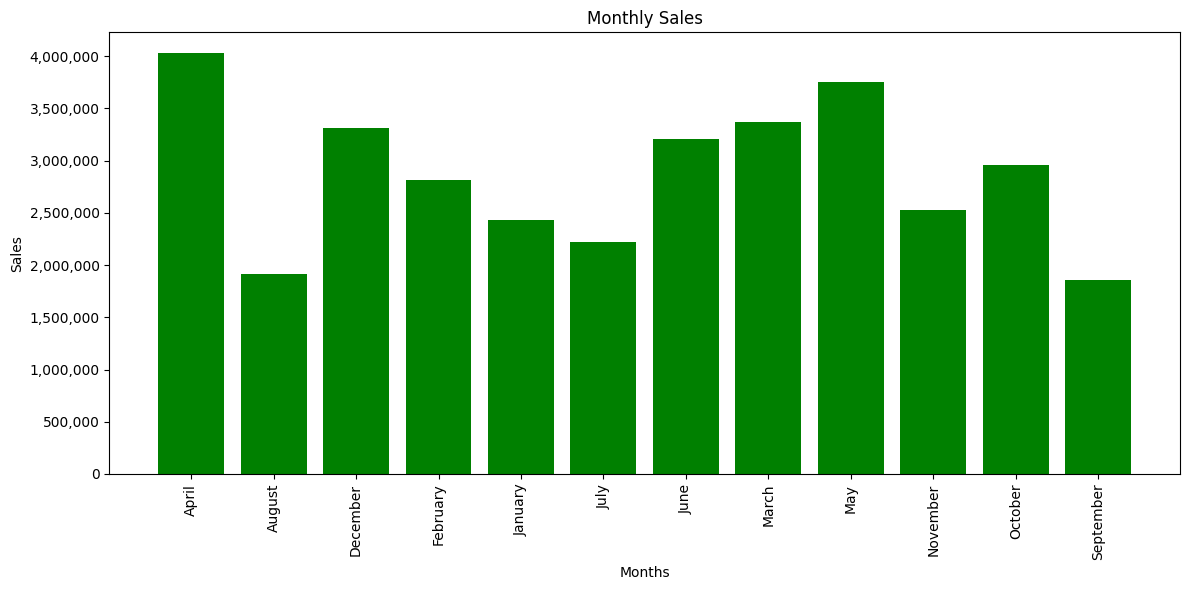

In [358]:
monthly_sales = pd.DataFrame(df.groupby(df.index.strftime('%B'))['Sales'].sum()).reset_index()
monthly_sales = monthly_sales.sort_values(by='Order_Date', ascending=True)

# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['Order_Date'], monthly_sales['Sales'], color='green')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.tight_layout()

In [359]:
monthly_sales

,Order_Date,Sales
0,April,4026647.58
1,August,1909881.42
2,December,3314378.12
3,February,2809644.24
4,January,2428898.65
5,July,2224768.73
6,June,3210939.59
7,March,3371228.59
8,May,3752817.97
9,November,2529016.87


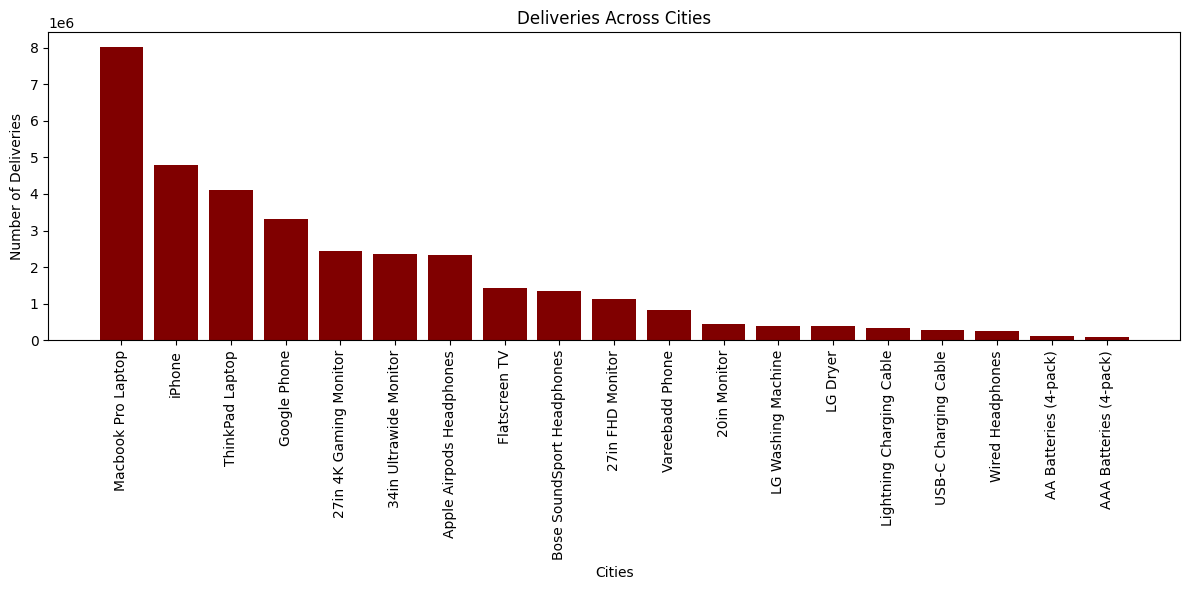

In [360]:
# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_sales['Product'], df_sales['Sales'], color='maroon')
plt.xlabel('Cities')
plt.ylabel('Number of Deliveries')
plt.title('Deliveries Across Cities')
plt.xticks(rotation=90)
plt.tight_layout()

In [361]:
# Extracting the city from each address in the DataFrame
df['City'] = df['Purchase_Address'].str.split(',').str[1].str.strip()

In [362]:
city_delivery = pd.DataFrame(df.groupby('City')['Order_ID'].count().reset_index(name='Deliveries'))
city_delivery

,City,Deliveries
0,Atlanta,14832
1,Austin,9878
2,Boston,19873
3,Dallas,14772
4,Los Angeles,29522
5,New York City,24807
6,Portland,12431
7,San Francisco,44587
8,Seattle,14689


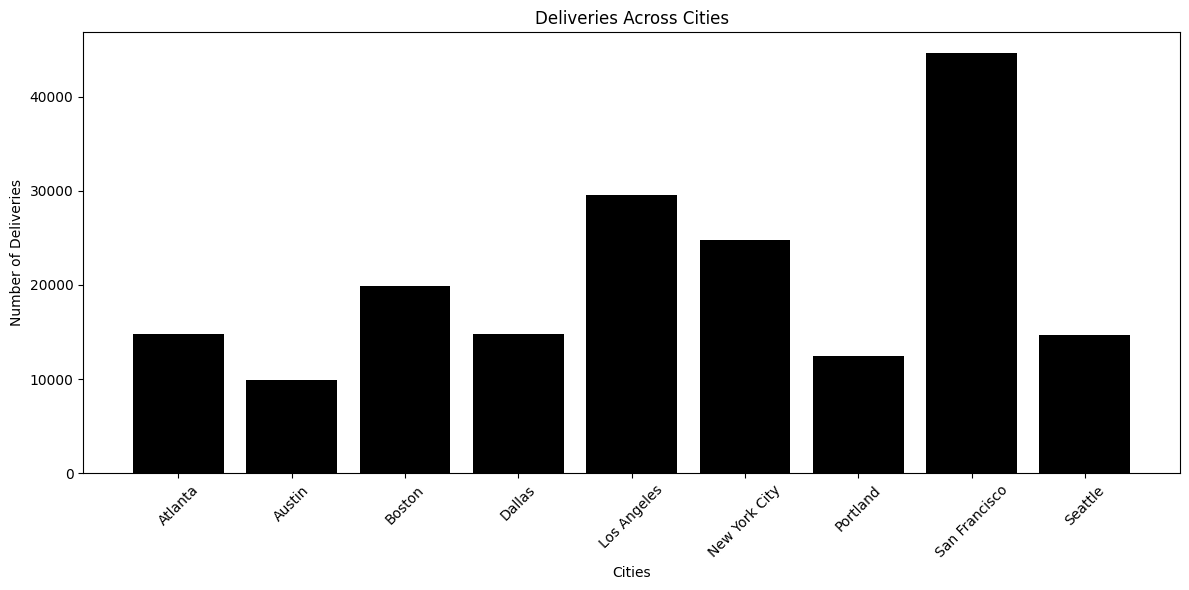

In [364]:
# Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(city_delivery['City'], city_delivery['Deliveries'], color='black')
plt.xlabel('Cities')
plt.ylabel('Number of Deliveries')
plt.title('Deliveries Across Cities')
plt.xticks(rotation=45)
plt.tight_layout()

In [365]:
df_cat_S = df.groupby('Category')['Sales'].sum().reset_index()
df_cat_S

,Category,Sales
0,Batteries,198182.18
1,Charging Cables,631670.65
2,Headphones,3930852.84
3,Home Appliances,784200.00
4,Laptops,12125758.86
5,Mobile Phones,8917800.00
6,Monitors,6363489.36
7,Televisions,1440300.00
